<a href="https://colab.research.google.com/github/StevenEscobarC/Inteligentes2-parcial1/blob/main/Parcial_Inteligentes_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montaje Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split, GridSearchCV
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
# Import Naivebayes
from sklearn.naive_bayes import GaussianNB
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

#
from sklearn.preprocessing import LabelEncoder

#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# para validación cruzada
from sklearn.model_selection import cross_val_score
# Maquinas
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

import plotly.express as px

from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv("/content/drive/Shareddrives/Inteligentes 2/chronic_kidney_disease.csv")
df = pd.DataFrame(data)

SE CAMBIA LOS TIPOS DE DATOS DE ACUERDO CON EL DATASET ORIGINAL

In [5]:
df['pcv'] = df['pcv'].astype('float64')
df['wbcc'] = df['wbcc'].astype('float64')
df['rbcc'] = df['rbcc'].astype('float64')

#CAMBIO DE CATEGORICOS A FLOTANTES DESPUÉS DE REVISAR EL DATASET, DETERMINAMOS QUE ERAN NUMÉRICOS
df['sg'] = df['sg'].astype('float64')
df['al'] = df['al'].astype('float64')
df['su'] = df['su'].astype('float64')


In [6]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


VERIFICAR TIPO DE DATOS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

REVISAR CUANTOS DATOS FALTANTES HAY EN EL DATASET

In [8]:
df.isnull().sum()  # indica cuantos datos nulos hay por atributo

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

REEMPLAZAR DATOS FALTANTES NUMÉRICOS

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df = df.fillna(df.mean(numeric_only=True)) # aplicar media a datos númericos faltantes

#categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Reemplazar los valores nulos en las columnas categóricas con la moda de cada columna
#for col in categorical_cols:
    #df[col].fillna(df[col].mode(), inplace=True)
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [11]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38.0,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.000000,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.000000,...,36.0,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


TRATAMIENTO DE DATOS CATEGORICOS NOMINALES FALTANTES

In [12]:
X=df.drop(['class'],axis=1)
y=df['class']


def impute_mode(feature):
    mode = X[feature].mode()[0]
    X[feature] = X[feature].fillna(mode)

In [13]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols[:-1]:
    impute_mode(col)

In [14]:
# Obtener el nombre de las columnas con datos categóricos
categorical_cols = df.select_dtypes(include='object').columns.tolist()
#df.describe()

In [15]:
df.isnull().sum()  # indica cuantos datos nulos hay por atributo

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [16]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.000000,5.200000
1,7.0,50.000000,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.000000,4.707435
2,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.000000,4.707435
3,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000
4,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.000000,4.600000
5,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000
6,68.0,70.000000,1.010,0.0,0.0,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.0,8406.122449,4.707435
7,24.0,76.469072,1.015,2.0,4.0,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.0,6900.000000,5.000000
8,52.0,100.000000,1.015,3.0,0.0,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.0,9600.000000,4.000000
9,53.0,90.000000,1.020,2.0,0.0,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.0,12100.000000,3.700000


<Axes: title={'center': 'Chronic_Kidney_Disease Data Set'}>

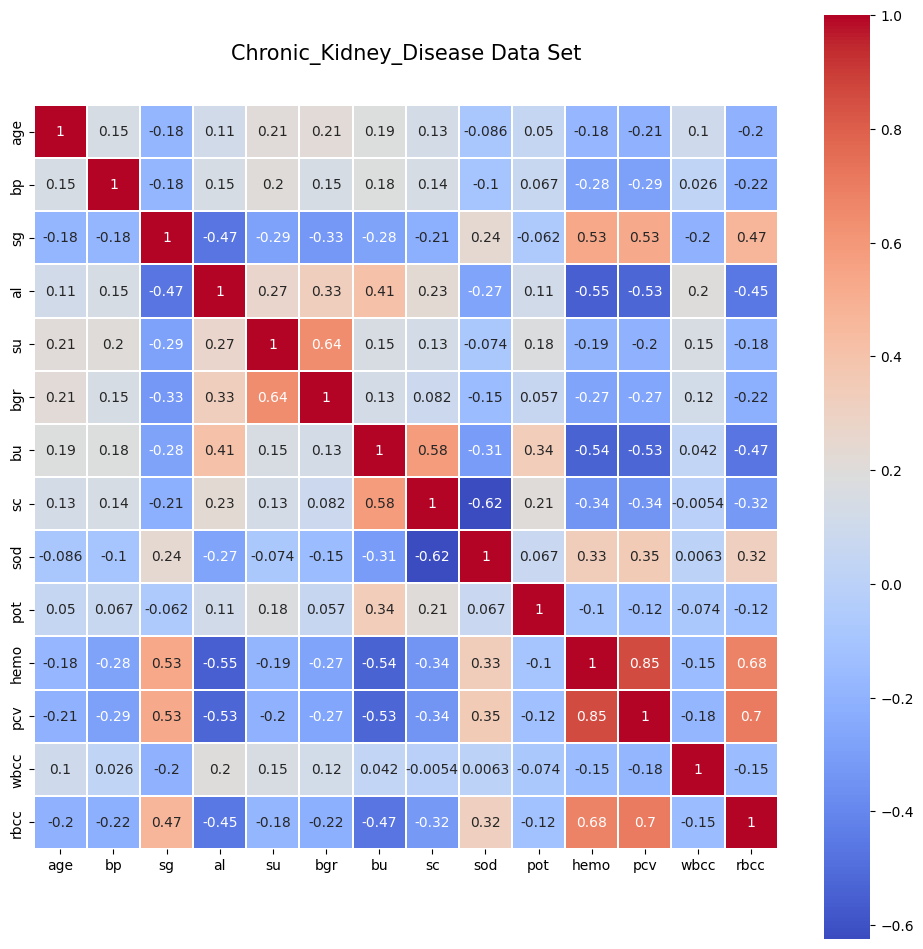

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Chronic_Kidney_Disease Data Set', y=1.05, size=15)
sb.heatmap(df_numeric.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

TRATAMIENTO DE DATOS ATÍPICOS

In [17]:
# Definir los cuartiles (25%, 50%, 75%)
quartiles = df.quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartílico (IQR)
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

# Calcular los límites inferior y superior para cada columna
iqr_lim_inf = quartiles.loc[0.25] - 1.5 * iqr
iqr_lim_sup = quartiles.loc[0.75] + 1.5 * iqr

# Aplicar el recorte iterativamente a cada columna
for column in df_numeric.columns:
        df_numeric[column + '_Capped'] = df_numeric[column].clip(lower=iqr_lim_inf[column], upper=iqr_lim_sup[column])

<ipython-input-17-32ec2e6d82cf>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = df.quantile([0.25, 0.5, 0.75])


# **LIMPIEZA DE DATOS**

In [ ]:
# looking at unique values in categorical columns
for col in categorical_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '        no' '        yes' nan] values

cad has ['no' 'yes' '        no' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values



In [ ]:
for col in df_numeric:
    print(f"{col} has {df[col].unique()} values\n")

age has [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ] values

bp has [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.      

KeyError: ignored

In [18]:
X[categorical_cols[:-1]].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 5 categories

cad has 3 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



In [19]:
df['dm'].replace(to_replace = {'        no':'no',' yes':'yes','        yes':'yes'},inplace=True)
df['cad'].replace(to_replace = {'        no':'no'}, inplace=True)

In [ ]:
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



# **Creación de BOX PLOT**

In [ ]:
for i, column in enumerate(df_numeric.columns):
  fig = px.box(df_numeric, y=df_numeric[column], width = 600, height=400)
  fig.show()

# **Creación Histogramas**

In [ ]:
for i, column in enumerate(df_numeric.columns):
  fig = px.histogram(df_numeric, x=df_numeric[column], width=800, height=400)
  fig.show()

# **Diagramas de barras para variables categóricas**

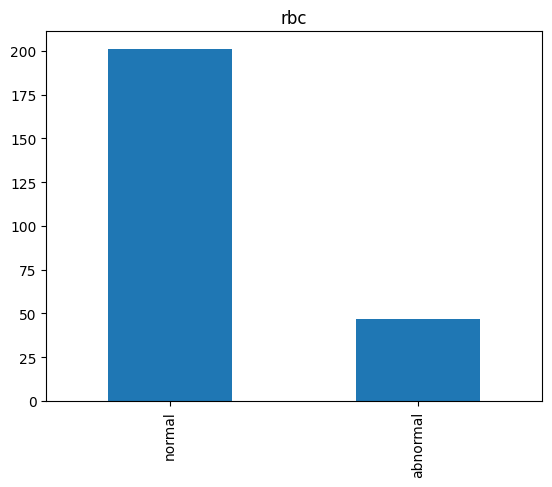

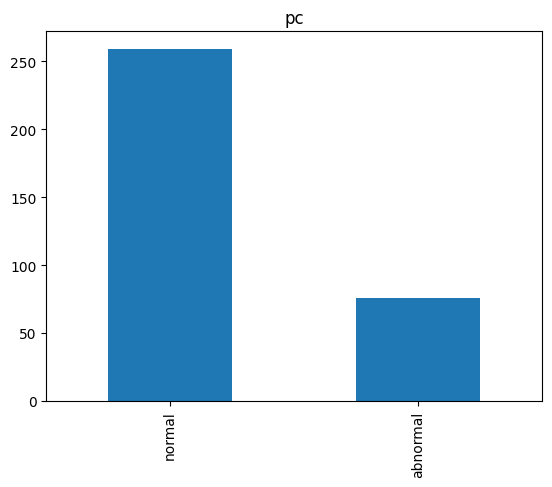

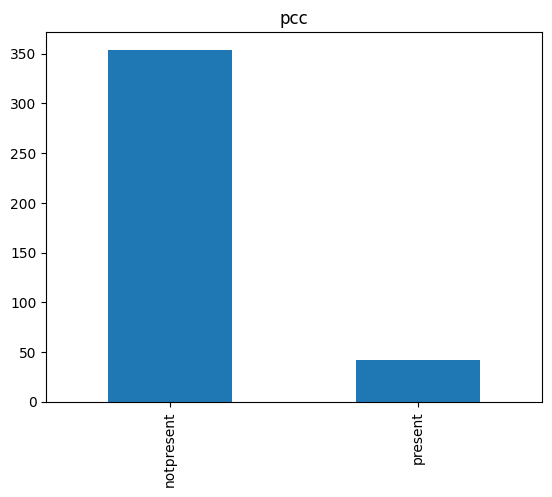

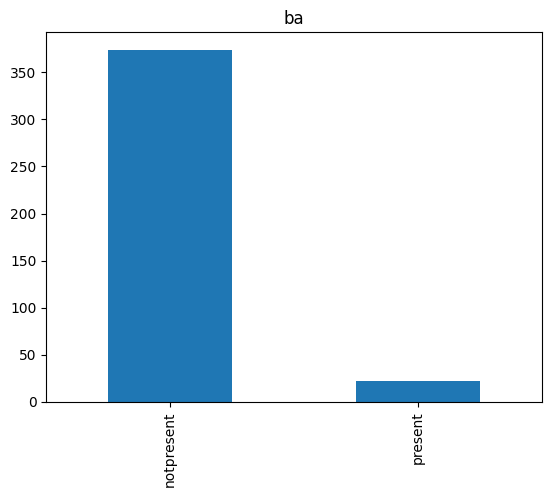

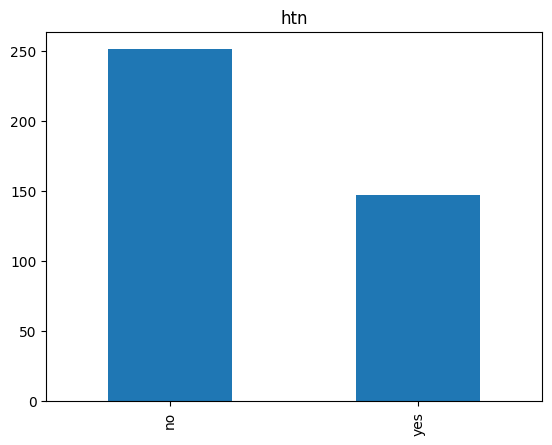

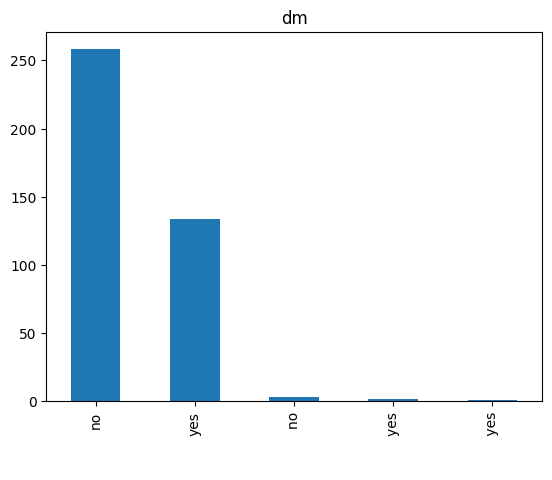

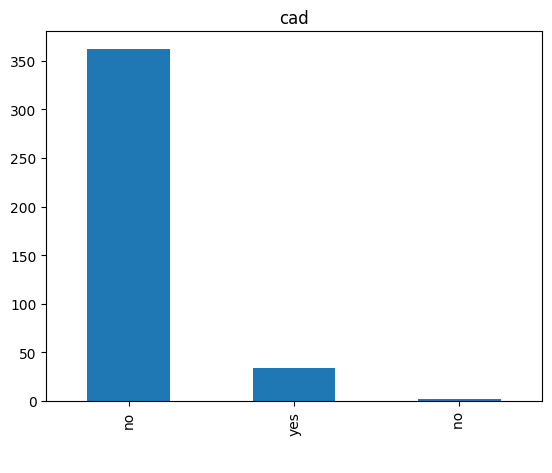

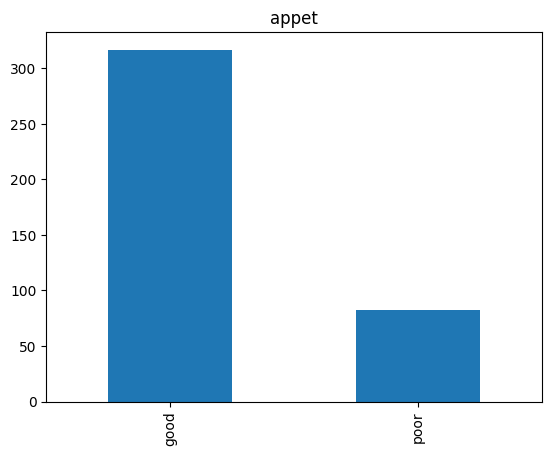

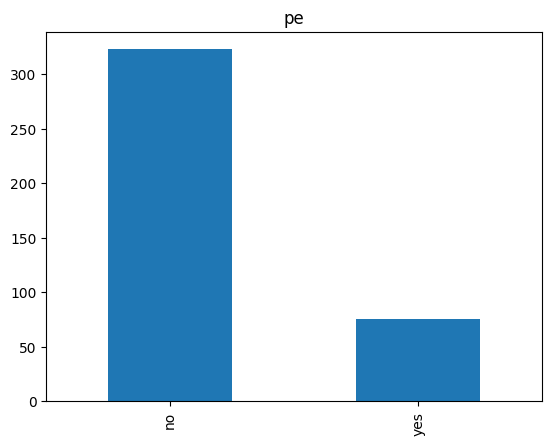

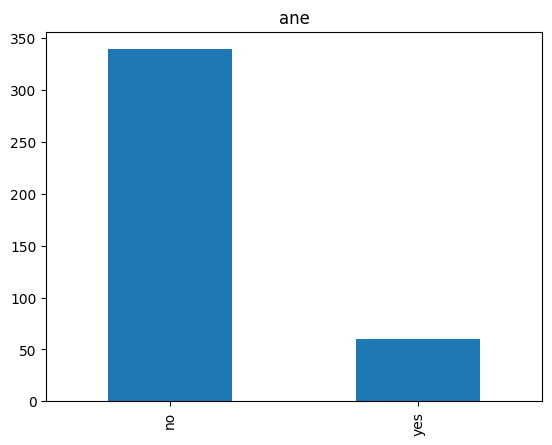

In [ ]:
from typing_extensions import dataclass_transform

categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col!= 'class'] # obteniendo los datos categoricos
# Mostrar los gráficos de barras para cada columna categórica
for col in categorical_cols:
      fig, ax = plt.subplots()
      data[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()


TRANSFORMAR DATOS CATEGORICOS A NUMÉRICOS

In [94]:
encoder=LabelEncoder()
cat_colsAll = [col for col in df.columns if df[col].dtype == 'object']
# Obtener columnas a encodificar

for col in cat_colsAll:
    if df[col].dtype == 'object':  # Comprobar si la columna contiene datos categóricos
        df[col] = encoder.fit_transform(df[col])

df.head(15)
X=df.drop(["class"],axis=1) # obtener valores de x
y=df["class"] # valores de y

<Axes: title={'center': 'Chronic Kidney Disease'}>

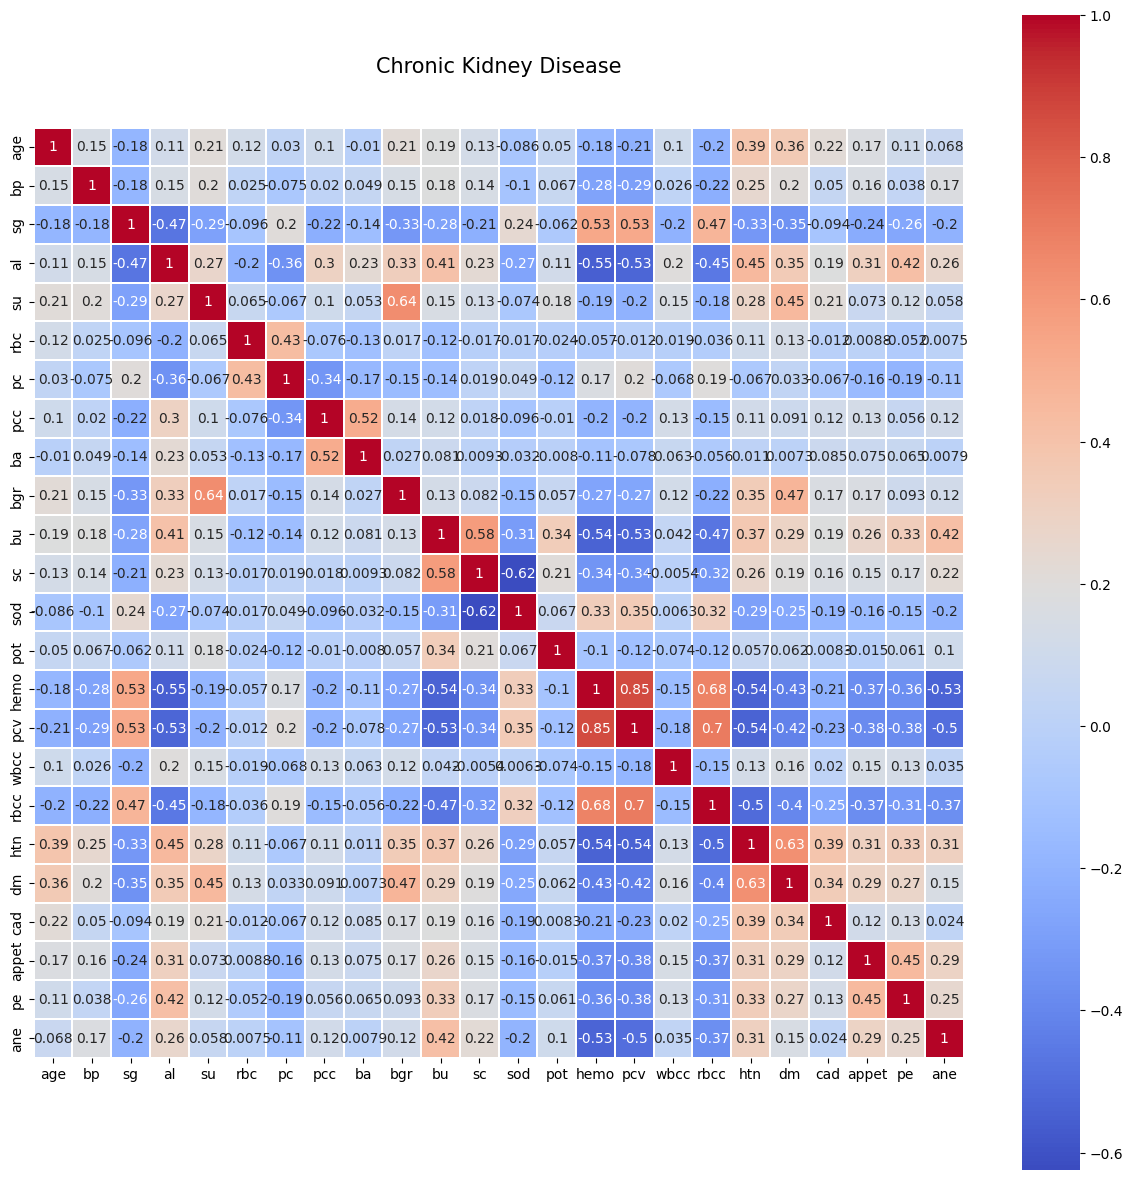

In [56]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(15,15))
plt.title('Chronic Kidney Disease', y=1.05, size=15)
sb.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [150]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
print("XTRain=",XTrain.shape)
print("XTest=",XTest.shape)

#normalizar los datos
escalar=MinMaxScaler()
XTrain=escalar.fit_transform(XTrain)
XTest=escalar.transform(XTest)
#print(XTrain)


XTRain= (320, 24)
XTest= (80, 24)


In [96]:
print(df.groupby("class").size())

class
0    250
1    150
dtype: int64


In [151]:
modeloG=GaussianNB(var_smoothing=1e-09)
modeloG.fit(XTrain,yTrain)
# valores de probar
alphas = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# obtener el mejor valor por validación cruzada
grid = GridSearchCV(estimator=modeloG, param_grid=alphas, cv=5)

# ajustamos el modelo a los datos
grid.fit(X, y)

print(f"El mejor valor para var_smoothing es: {grid.best_params_['var_smoothing']}")


yPredict=modeloG.predict(XTest)
print(yPredict)

El mejor valor para var_smoothing es: 1e-09
[0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 0 0]


[[48  2]
 [ 2 28]]


<Axes: >

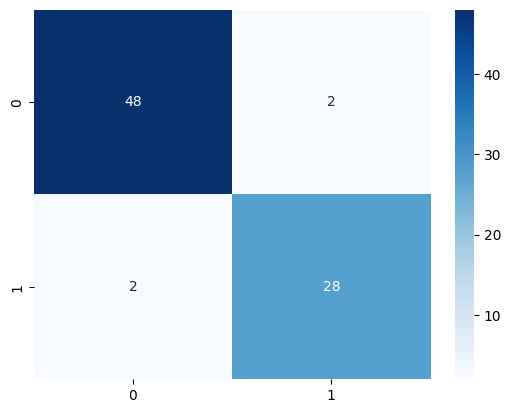

In [152]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

In [153]:
# Realizar validación cruzada
cv_scores = cross_val_score(modeloG, XTrain, yTrain, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", cv_scores)

# Calcular la puntuación media de validación cruzada
mean_cv_score = cv_scores.mean()
print("Puntuación media de validación cruzada:", mean_cv_score)

Puntajes de validación cruzada: [0.953125 0.9375   0.9375   0.921875 0.890625]
Puntuación media de validación cruzada: 0.928125


In [154]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["ckd","notckd"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
reportNaive = classification_report(yTest,yPredict,target_names=etiquetas)
accuracyNaive = modeloG.score(XTest,yTest)
print("Accuracy=",accuracyNaive)

              precision    recall  f1-score   support

         ckd       0.96      0.96      0.96        50
      notckd       0.93      0.93      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Accuracy= 0.95


# **Con PCA**

XTRain= (320, 16)
XTest= (80, 16)
[[0.17767922 0.23232535 0.10440396 ... 0.12526997 0.51241664 0.29832446]
 [0.37603373 0.31504141 0.44828197 ... 0.12116723 0.31161213 0.53259129]
 [0.24793479 0.31844337 0.35377734 ... 0.19789558 0.44229647 0.73826335]
 ...
 [0.25644574 0.25314522 0.08619787 ... 0.2561546  0.36098979 0.2777938 ]
 [0.2564499  0.29942462 0.15258267 ... 0.35660183 0.57964057 0.4664397 ]
 [0.30578155 0.27429702 0.1926045  ... 0.2023993  0.40830168 0.38952256]]
[0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 0 0]
              precision    recall  f1-score   support

         ckd       0.96      0.96      0.96        50
      notckd       0.93      0.93      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Exactitud del modelo: 0.95
[[48

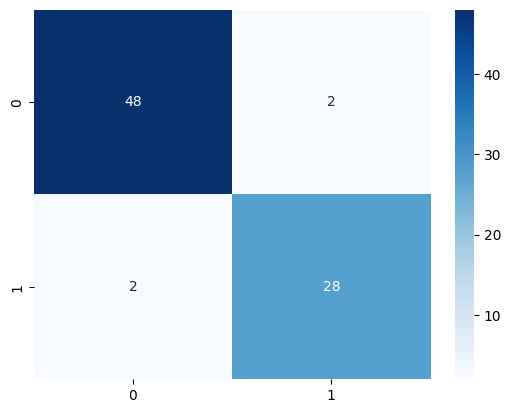

In [157]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Elegir el número de componentes principales para PCA
numeroComponentes = 16 # Cambia este número según tus necesidades

#X=df.drop(["class","age","bp","rbc","pc","pcc","ba","bu","sod","hemo","htn","cad","appet","pe","ane"],axis=1) # obtener valores de x
#y=df["class"] # valores de y

# Aplicar PCA
pca = PCA(n_components=numeroComponentes)
X_pca = pca.fit_transform(X)

# Dividir los datos reducidos en conjuntos de entrenamiento y prueba
XTrain,XTest,yTrain,yTest=train_test_split(X_pca,y, test_size=0.2, stratify=y, random_state=42)
print("XTRain=",XTrain.shape)
print("XTest=",XTest.shape)

escalar=MinMaxScaler()
XTrain=escalar.fit_transform(XTrain)
XTest=escalar.transform(XTest)
print(XTrain)

#Modelo de Naive Bayes
modeloG=GaussianNB(var_smoothing=1e-09)
modeloG.fit(XTrain,yTrain)
yPredict=modeloG.predict(XTest)
print(yPredict)

# Evaluar el rendimiento del modelo, por ejemplo, con accuracy
accuracy = modeloG.score(XTest, yTest)
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["ckd","notckd"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
print("Exactitud del modelo:", accuracy)

matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sns.heatmap(matriz,annot=True,cmap="Blues")

# Realizar validación cruzada (por ejemplo, con 5 pliegues)
cv_scores = cross_val_score(modeloG, XTrain, yTrain, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", cv_scores)

# Calcular la puntuación media de validación cruzada
mean_cv_score = cv_scores.mean()
print("Puntuación media de validación cruzada:", mean_cv_score)



In [142]:
# Define el rango de valores para el número de componentes que deseas probar
componentes_a_probar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

mejor_accuracy = 0
mejor_n_componentes = None

for n_componentes in componentes_a_probar:
    # Aplica PCA con el número actual de componentes
    pca = PCA(n_components=n_componentes)
    X_pca = pca.fit_transform(X)

    # Divide los datos reducidos en conjuntos de entrenamiento y prueba
    XTrain, XTest, yTrain, yTest = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

    # Escala los datos
    escalar = MinMaxScaler()
    XTrain = escalar.fit_transform(XTrain)
    XTest = escalar.transform(XTest)

    # Crea y entrena el modelo Naive Bayes
    modeloG = GaussianNB(var_smoothing=1e-09)
    modeloG.fit(XTrain, yTrain)

    # Evalúa el modelo en el conjunto de prueba
    accuracy = modeloG.score(XTest, yTest)

    # Actualiza el mejor número de componentes si encontramos un modelo con un mejor rendimiento
    if accuracy > mejor_accuracy:
        mejor_accuracy = accuracy
        mejor_n_componentes = n_componentes

# Imprime el número óptimo de componentes y el mejor rendimiento
print("El número óptimo de componentes es:", mejor_n_componentes)
print("Exactitud del modelo con el número óptimo de componentes:", mejor_accuracy)

El número óptimo de componentes es: 16
Exactitud del modelo con el número óptimo de componentes: 0.95
